Importing Libraries

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_recall_fscore_support, PrecisionRecallDisplay
)
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                             PrecisionRecallDisplay)
import seaborn as sns
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from skopt import BayesSearchCV
import warnings
import xgboost as xgb
from sklearn.tree import export_text
import scorecardpy as sc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Importing Dataset

In [58]:
dataset = pd.read_csv('Customer_Churn_Modified.csv')

In [49]:
columns_to_drop = [
    "Frequency of use",         
    "Age Group",                
    "Distinct Called Numbers"   
]


dataset = dataset.drop(columns=columns_to_drop)


Creating the First Set of Training and Test Set without any Implementations

In [59]:
# Define feature columns (X) and target column (y)
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, -1].values

# Split the dataset into training and testing sets
def custom_train_test_split(X, y, test_size=0.2, stratify=None, random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=stratify, random_state=random_state)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = custom_train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Function to print class proportions
def print_proportions(y):
    unique, counts = np.unique(y, return_counts=True)
    total = len(y)
    for val, count in zip(unique, counts):
        print(f"Class {val}: {count} ({count/total*100:.1f}%)")

print("\nTraining set proportions:")
print_proportions(y_train)
print("\nTest set proportions:")
print_proportions(y_test)


Training set proportions:
Class 0: 2124 (84.3%)
Class 1: 396 (15.7%)

Test set proportions:
Class 0: 531 (84.3%)
Class 1: 99 (15.7%)


Running Desicion Trees on Default Data

Results for CART Classifier (Gini):
Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       531
           1       0.93      0.85      0.89        99

    accuracy                           0.97       630
   macro avg       0.95      0.92      0.93       630
weighted avg       0.97      0.97      0.97       630



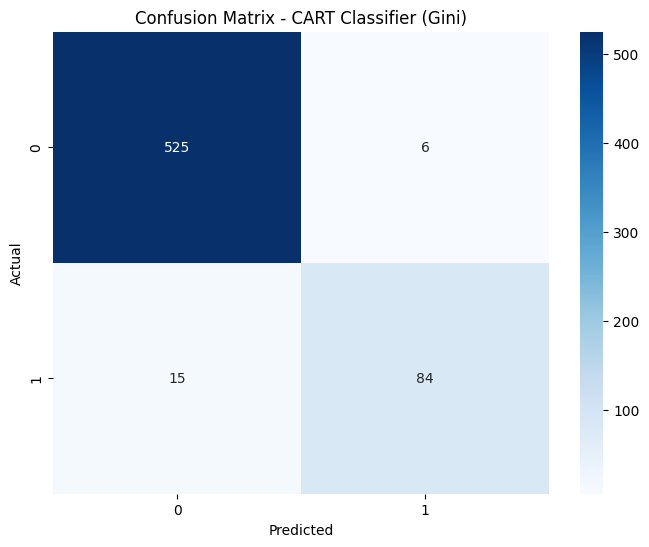

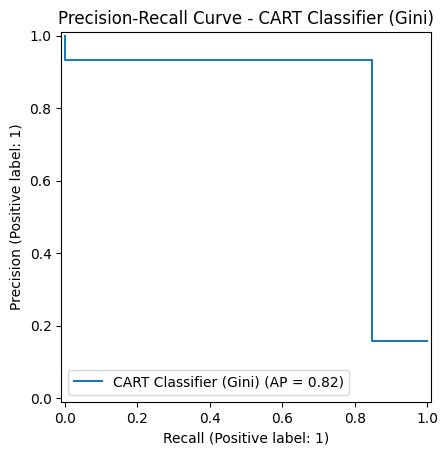

Results for ID3 Classifier (Entropy):
Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       531
           1       0.84      0.88      0.86        99

    accuracy                           0.96       630
   macro avg       0.91      0.92      0.92       630
weighted avg       0.96      0.96      0.96       630



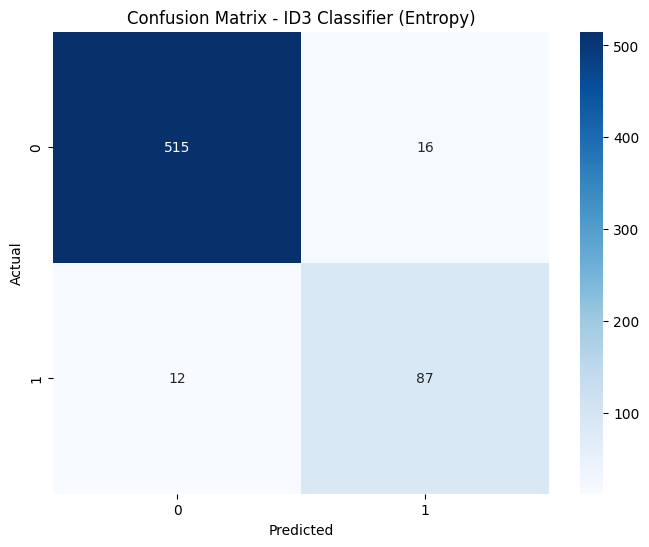

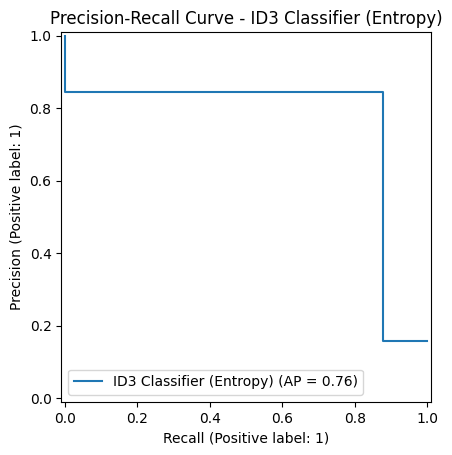

Results for C4.5 Classifier Approximation:
Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       531
           1       0.84      0.88      0.86        99

    accuracy                           0.96       630
   macro avg       0.91      0.92      0.92       630
weighted avg       0.96      0.96      0.96       630



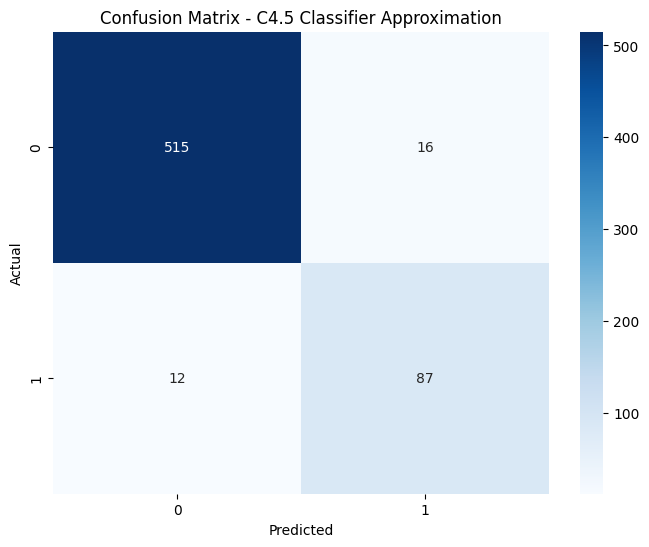

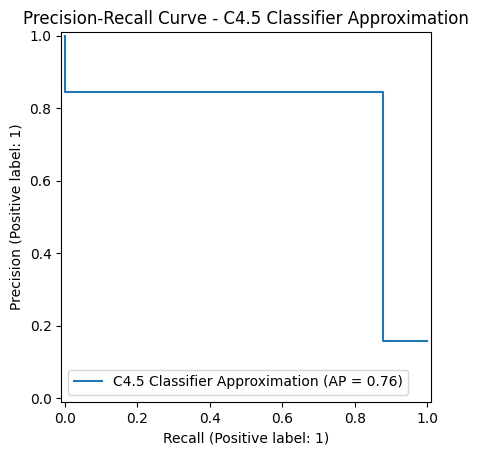

Results for Extra Tree Classifier:
Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       531
           1       0.89      0.83      0.86        99

    accuracy                           0.96       630
   macro avg       0.93      0.90      0.92       630
weighted avg       0.96      0.96      0.96       630



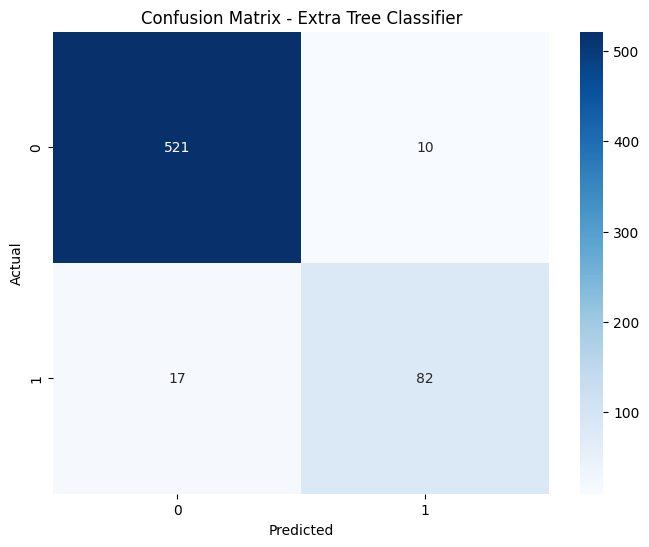

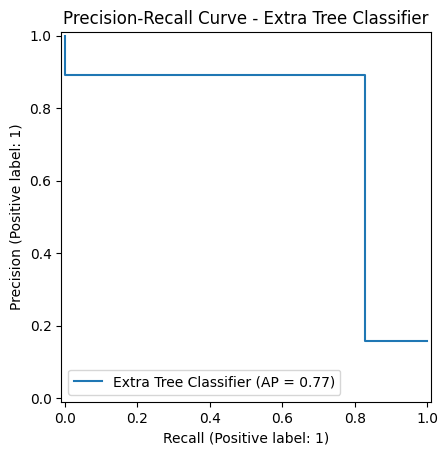

Results for Random Forest Classifier:
Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       531
           1       0.99      0.88      0.93        99

    accuracy                           0.98       630
   macro avg       0.98      0.94      0.96       630
weighted avg       0.98      0.98      0.98       630



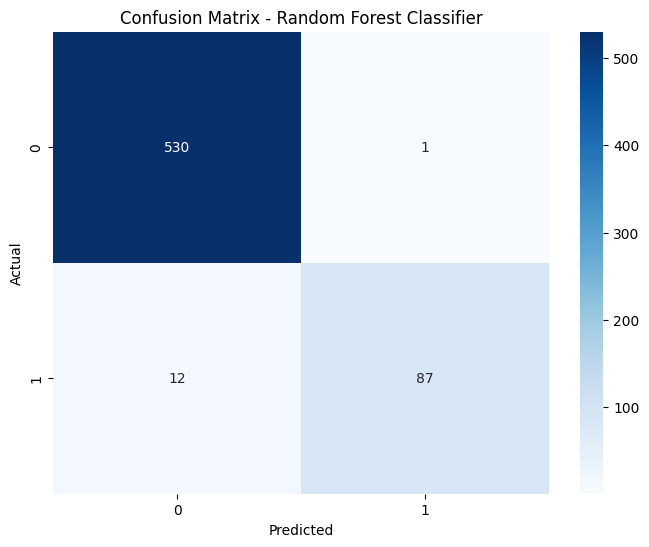

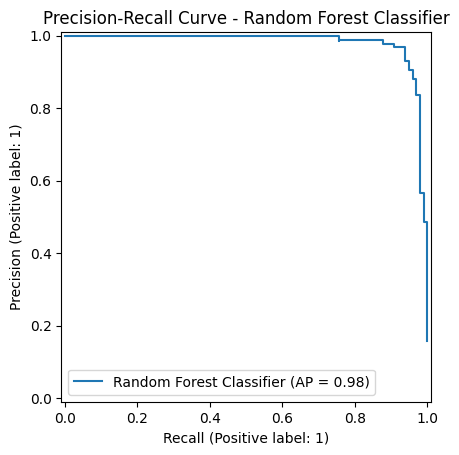

Results for Gradient Boosting Classifier:
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       531
           1       0.94      0.75      0.83        99

    accuracy                           0.95       630
   macro avg       0.95      0.87      0.90       630
weighted avg       0.95      0.95      0.95       630



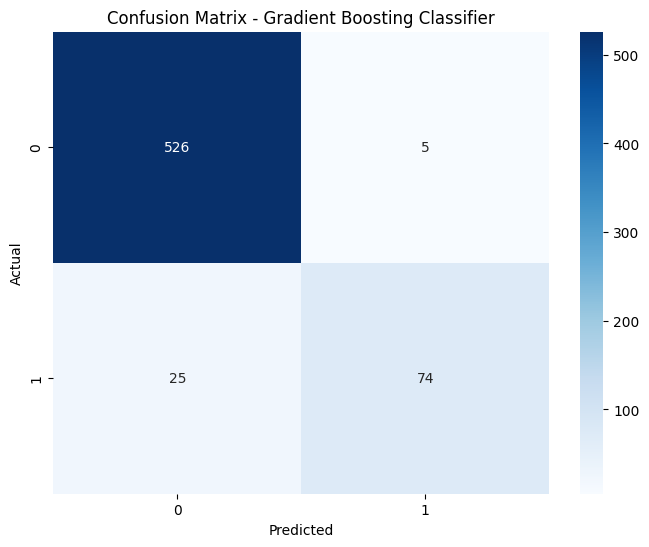

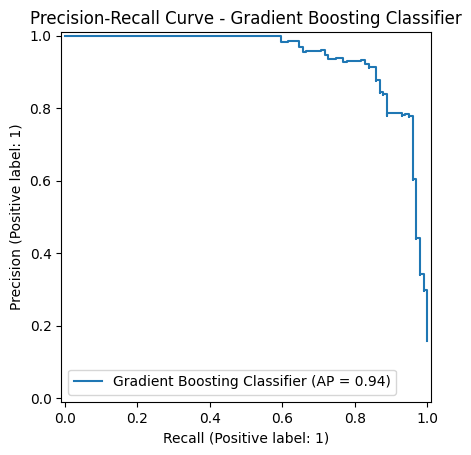

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Results for AdaBoost Classifier with Decision Tree:
Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       531
           1       0.88      0.85      0.86        99

    accuracy                           0.96       630
   macro avg       0.92      0.91      0.92       630
weighted avg       0.96      0.96      0.96       630



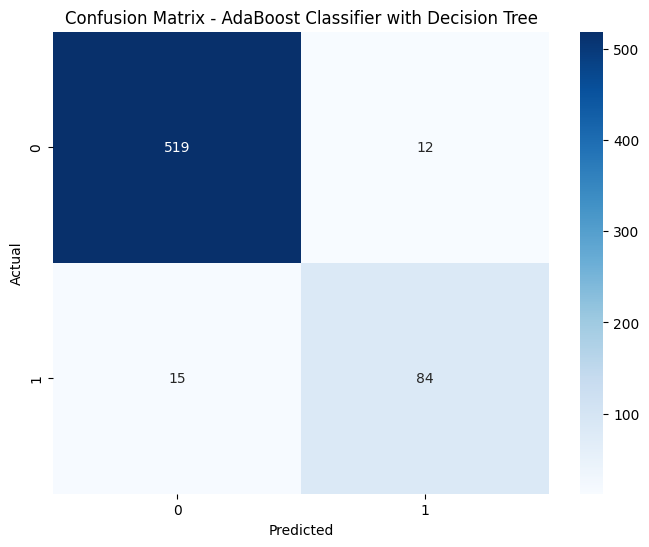

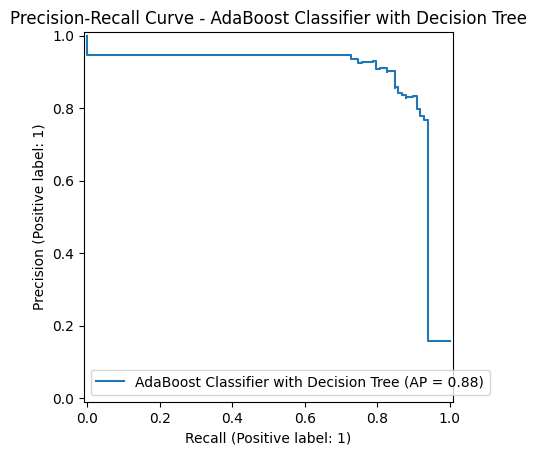

Results for XGBoost Classifier:
Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       531
           1       0.95      0.93      0.94        99

    accuracy                           0.98       630
   macro avg       0.97      0.96      0.96       630
weighted avg       0.98      0.98      0.98       630



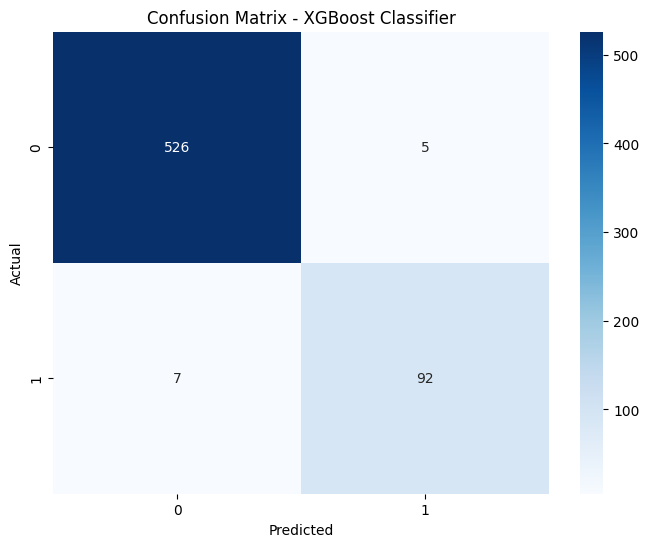

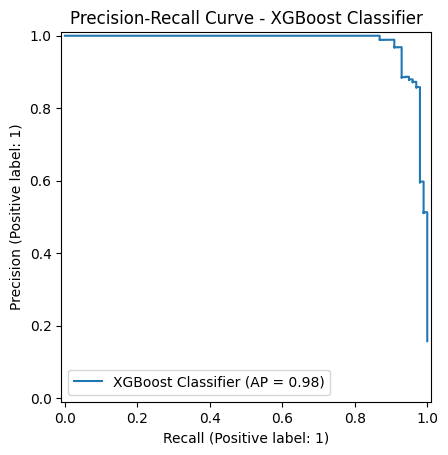

Summary of Model Accuracies:
  CART Classifier (Gini): 0.97
  ID3 Classifier (Entropy): 0.96
  C4.5 Classifier Approximation: 0.96
  Extra Tree Classifier: 0.96
  Random Forest Classifier: 0.98
  Gradient Boosting Classifier: 0.95
  AdaBoost Classifier with Decision Tree: 0.96
  XGBoost Classifier: 0.98


In [35]:
model_accuracies = {}

def train_and_evaluate_model(model, model_name):
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate and store accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy

    # Display Accuracy and Classification Report
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Convert classification report to a DataFrame
    class_report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(class_report).transpose()

    # Ensure the output directory exists
    output_dir = "Decision Tree Results"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Construct the Excel filename inside the existing directory
    excel_filename = os.path.join(
        output_dir,
        f"Default_Classification_Report_{model_name.replace(' ', '_')}.xlsx"
    )
    df_report.to_excel(excel_filename)

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=np.unique(y_test),
        yticklabels=np.unique(y_test)
    )
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Plot Precision-Recall Curve
    try:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba, name=model_name)
        display.ax_.set_title(f"Precision-Recall Curve - {model_name}")
        plt.show()
    except AttributeError:
        print(f"Warning: {model_name} does not support probability predictions.")



# 1. CART (Classification and Regression Tree) - Gini impurity
cart_classifier = DecisionTreeClassifier(criterion='gini', random_state=42)
train_and_evaluate_model(cart_classifier, "CART Classifier (Gini)")

# 2. ID3 - Approximated using entropy as the criterion
id3_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
train_and_evaluate_model(id3_classifier, "ID3 Classifier (Entropy)")

# 3. C4.5 - Approximated using entropy, similar to ID3
c4_5_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
train_and_evaluate_model(c4_5_classifier, "C4.5 Classifier Approximation")

# 4. Extra Tree Classifier (another variant of decision trees)
extra_tree_classifier = ExtraTreeClassifier(random_state=42)
train_and_evaluate_model(extra_tree_classifier, "Extra Tree Classifier")

# 5. Random Forest Classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
train_and_evaluate_model(random_forest_classifier, "Random Forest Classifier")

# 6. Gradient Boosting Classifier
gradient_boosting_classifier = GradientBoostingClassifier(random_state=42)
train_and_evaluate_model(gradient_boosting_classifier, "Gradient Boosting Classifier")

# 7. AdaBoost Classifier (with a Decision Tree as the base estimator)
adaboost_classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)
train_and_evaluate_model(adaboost_classifier, "AdaBoost Classifier with Decision Tree")

# 8. XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)
train_and_evaluate_model(xgb_classifier, "XGBoost Classifier")


# ================== Print all model accuracies at the end ==================
print("Summary of Model Accuracies:")
for name, acc in model_accuracies.items():
    print(f"  {name}: {acc:.2f}")


WOE Transformation

[INFO] creating woe binning ...


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\scorecardpy\woebin.py:320: FutureWarning

[INFO] converting into woe values ...
Results for CART Classifier (Gini):
Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       520
           1       0.85      0.75      0.80       110

    accuracy                           0.93       630
   macro avg       0.90      0.86      0.88       630
weighted avg       0.93      0.93      0.93       630



c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning_1bst_brk = binning_1bst_brk.groupby(['variable', 'bstbin'], group_keys=False)\
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .agg({'good':sum, 'bad':sum}).reset_index().assign(bin=lambda x: x['bstbin'])\
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <b

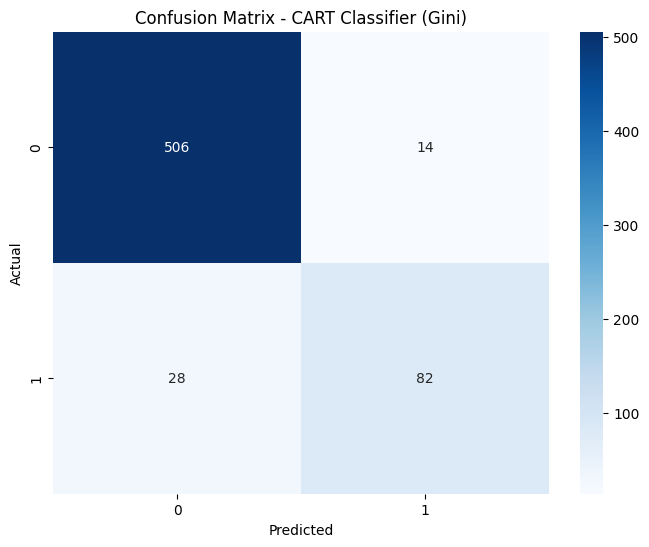

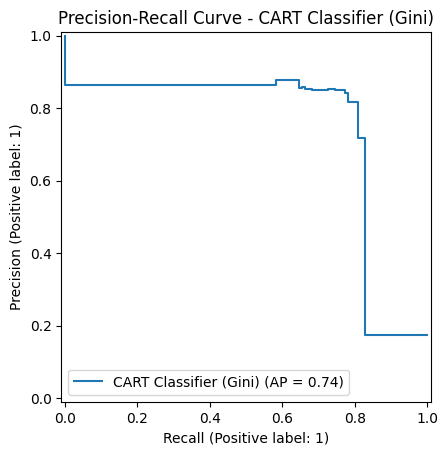

Example Results (Actual vs Predicted) for CART Classifier (Gini): [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]


Results for ID3 Classifier (Entropy):
Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       520
           1       0.88      0.75      0.81       110

    accuracy                           0.94       630
   macro avg       0.92      0.87      0.89       630
weighted avg       0.94      0.94      0.94       630



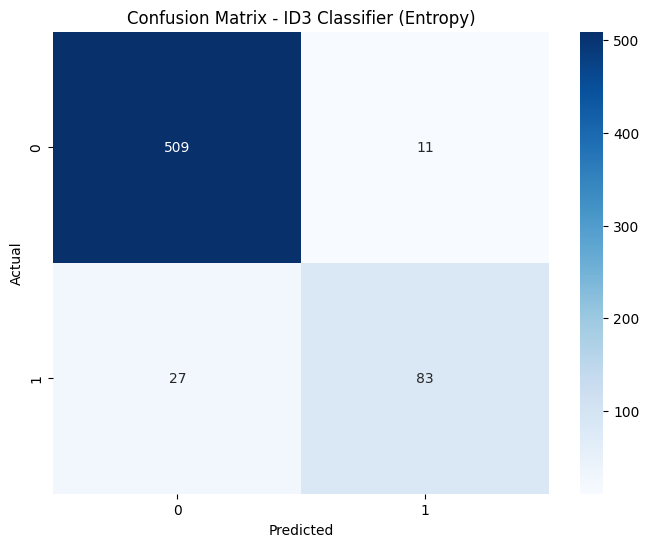

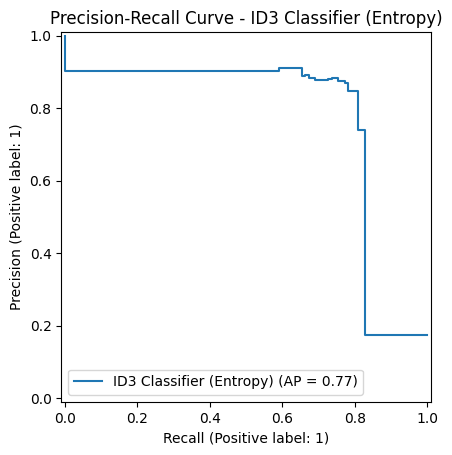

Example Results (Actual vs Predicted) for ID3 Classifier (Entropy): [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]


Results for C4.5 Classifier Approximation:
Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       520
           1       0.88      0.75      0.81       110

    accuracy                           0.94       630
   macro avg       0.92      0.87      0.89       630
weighted avg       0.94      0.94      0.94       630



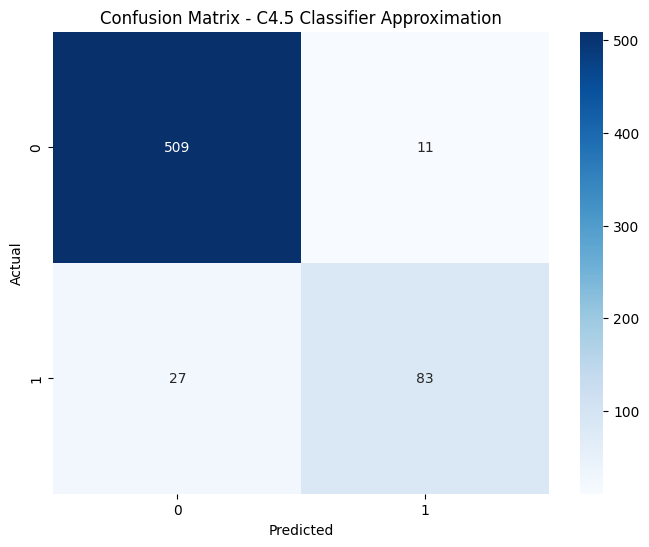

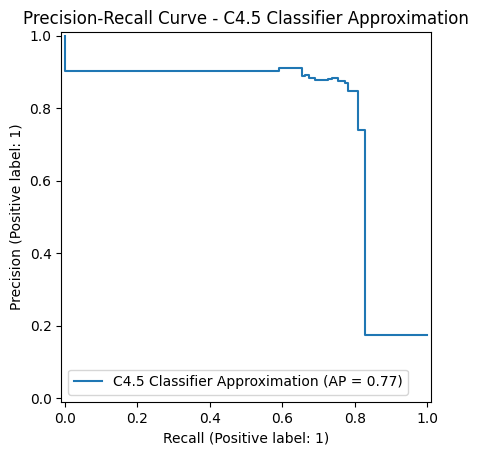

Example Results (Actual vs Predicted) for C4.5 Classifier Approximation: [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]


Results for Extra Tree Classifier:
Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       520
           1       0.87      0.73      0.79       110

    accuracy                           0.93       630
   macro avg       0.91      0.85      0.88       630
weighted avg       0.93      0.93      0.93       630



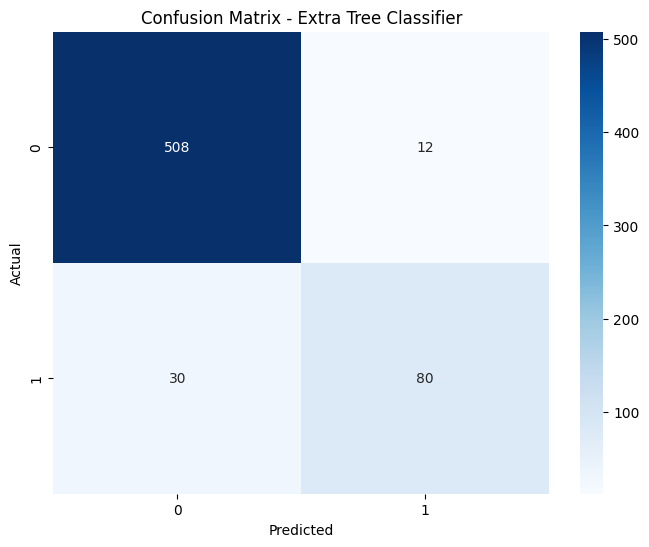

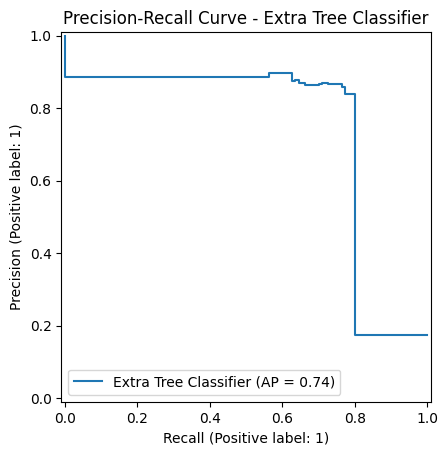

Example Results (Actual vs Predicted) for Extra Tree Classifier: [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]


Results for Random Forest Classifier:
Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       520
           1       0.87      0.77      0.82       110

    accuracy                           0.94       630
   macro avg       0.91      0.87      0.89       630
weighted avg       0.94      0.94      0.94       630



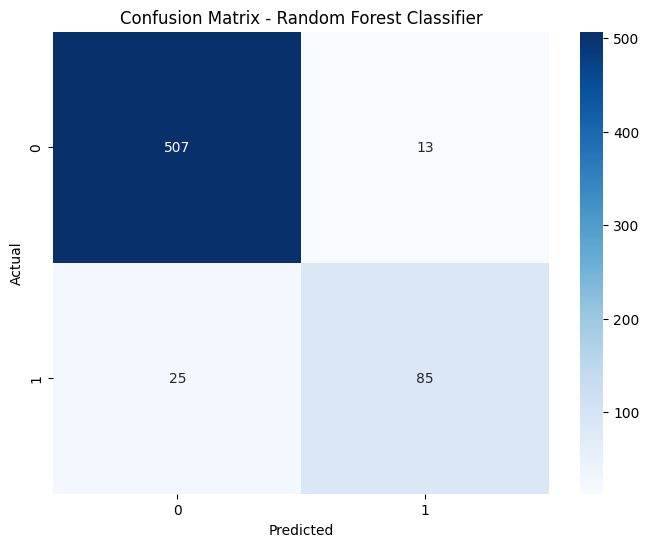

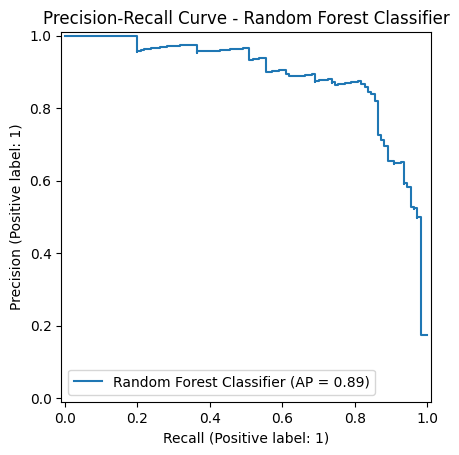

Example Results (Actual vs Predicted) for Random Forest Classifier: [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]


Results for Gradient Boosting Classifier:
Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       520
           1       0.85      0.67      0.75       110

    accuracy                           0.92       630
   macro avg       0.89      0.82      0.85       630
weighted avg       0.92      0.92      0.92       630



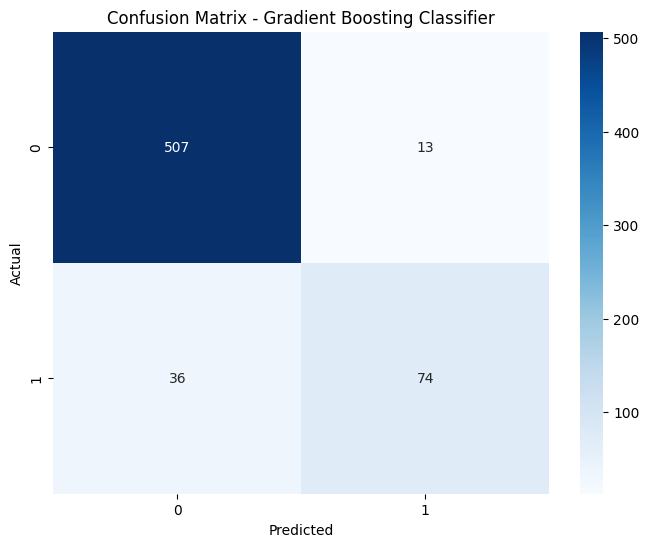

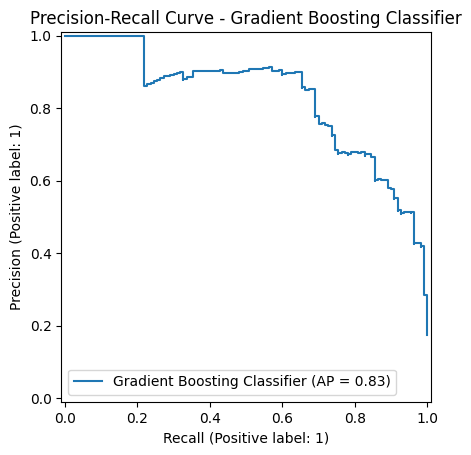

Example Results (Actual vs Predicted) for Gradient Boosting Classifier: [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]


Results for AdaBoost Classifier with Decision Tree:
Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       520
           1       0.86      0.75      0.80       110

    accuracy                           0.93       630
   macro avg       0.90      0.86      0.88       630
weighted avg       0.93      0.93      0.93       630



c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


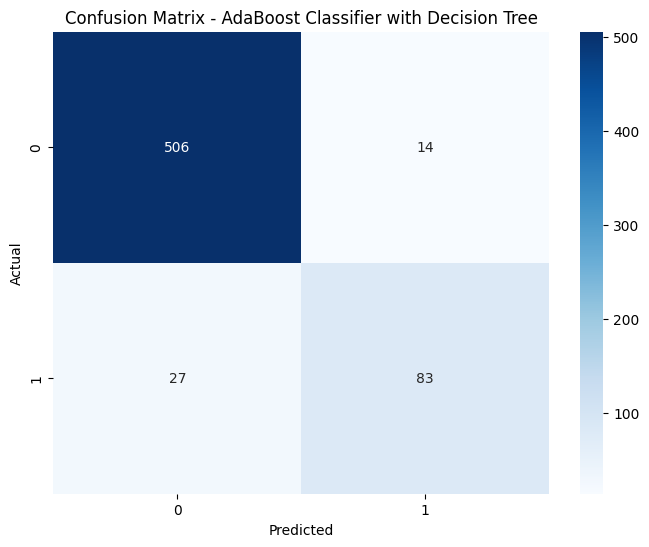

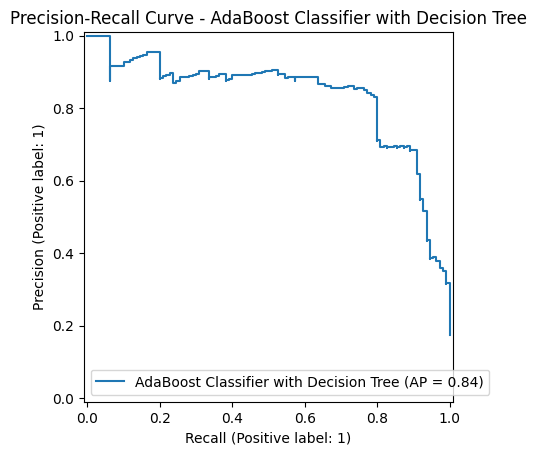

Example Results (Actual vs Predicted) for AdaBoost Classifier with Decision Tree: [(0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]


Results for XGBoost Classifier:
Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       520
           1       0.85      0.76      0.80       110

    accuracy                           0.93       630
   macro avg       0.90      0.87      0.88       630
weighted avg       0.93      0.93      0.93       630



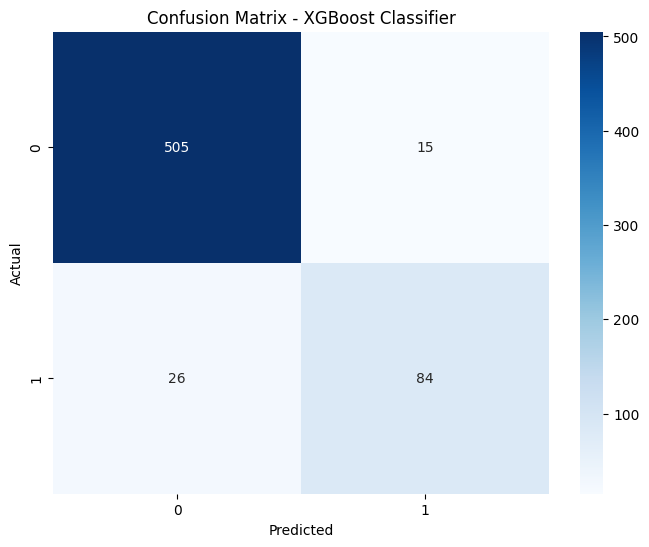

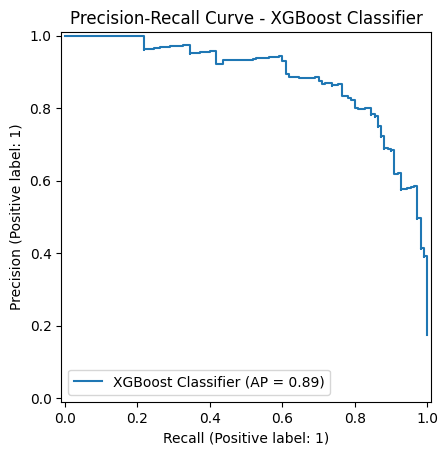

Example Results (Actual vs Predicted) for XGBoost Classifier: [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]




In [42]:
dataset = pd.read_csv('Customer_Churn_Modified.csv')

# Automatically take all columns except the last as features, and the last column as the target
target_variable = dataset.columns[-1]
features_to_bin = dataset.columns[:-1].tolist()

# Perform WOE binning and transformation
bins = sc.woebin(dataset, y=target_variable, x=features_to_bin)
dataset_woe = sc.woebin_ply(dataset, bins)

# Step 2: Split the Data into Training and Test Sets
X = dataset_woe.drop(target_variable, axis=1)
y = dataset_woe[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the Modeling and Evaluation Function
def train_and_evaluate_model(model, model_name):
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Display Accuracy and Classification Report
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)

    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Save Classification Report to Excel
    df_report = pd.DataFrame(class_report).transpose()
    excel_filename = f"Decision Tree Results/WOE_Classification_Report_{model_name.replace(' ', '_')}.xlsx"
    df_report.to_excel(excel_filename)
    

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Plot Precision-Recall Curve
    try:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba, name=model_name)
        display.ax_.set_title(f"Precision-Recall Curve - {model_name}")
        plt.show()
    except AttributeError:
        print(f"Warning: {model_name} does not support probability predictions.")

    # Example Output
    example = list(zip(y_test[:10], y_pred[:10]))  # Display the first 10 actual vs predicted
    print(f"Example Results (Actual vs Predicted) for {model_name}: {example}")

    print("\n" + "="*50 + "\n")

# Step 4: Train and Evaluate Models
# 1. CART (Classification and Regression Tree) - Gini impurity
cart_classifier = DecisionTreeClassifier(criterion='gini', random_state=42)
train_and_evaluate_model(cart_classifier, "CART Classifier (Gini)")

# 2. ID3 - Approximated using entropy as the criterion
id3_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
train_and_evaluate_model(id3_classifier, "ID3 Classifier (Entropy)")

# 3. C4.5 - Approximated using entropy, similar to ID3
c4_5_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
train_and_evaluate_model(c4_5_classifier, "C4.5 Classifier Approximation")

# 4. Extra Tree Classifier (another variant of decision trees)
extra_tree_classifier = ExtraTreeClassifier(random_state=42)
train_and_evaluate_model(extra_tree_classifier, "Extra Tree Classifier")

# 5. Random Forest Classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
train_and_evaluate_model(random_forest_classifier, "Random Forest Classifier")

# 6. Gradient Boosting Classifier
gradient_boosting_classifier = GradientBoostingClassifier(random_state=42)
train_and_evaluate_model(gradient_boosting_classifier, "Gradient Boosting Classifier")

# 7. AdaBoost Classifier (with a Decision Tree as the base estimator)
adaboost_classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)
train_and_evaluate_model(adaboost_classifier, "AdaBoost Classifier with Decision Tree")

# 8. XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)
train_and_evaluate_model(xgb_classifier, "XGBoost Classifier")


Optimizing the Models by Implementing Hyperparameters

Results for CART Classifier (Gini):
Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       531
           1       0.93      0.85      0.89        99

    accuracy                           0.97       630
   macro avg       0.95      0.92      0.93       630
weighted avg       0.97      0.97      0.97       630



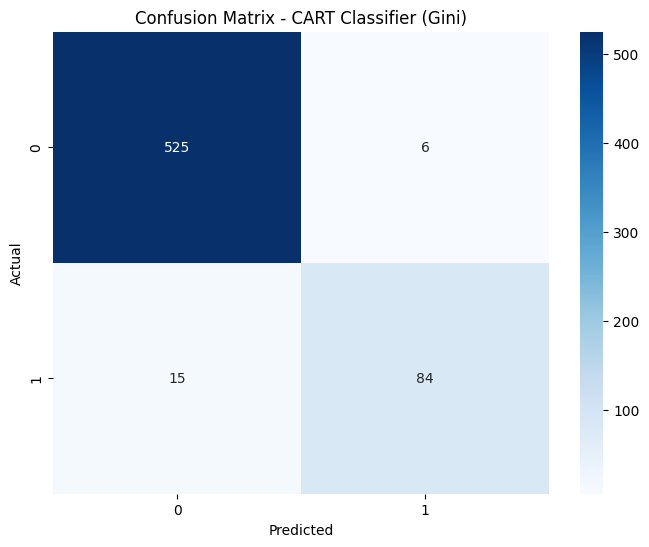

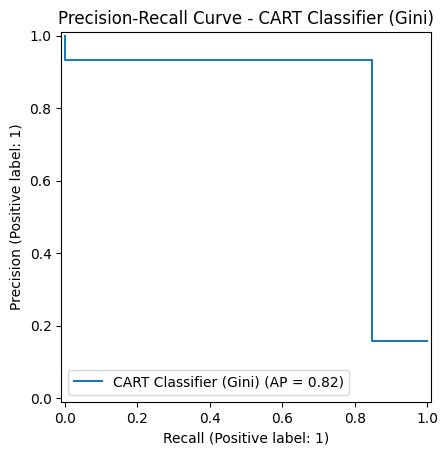



Results for ID3 Classifier (Entropy):
Accuracy: 0.9555555555555556
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       531
           1       0.84      0.88      0.86        99

    accuracy                           0.96       630
   macro avg       0.91      0.92      0.92       630
weighted avg       0.96      0.96      0.96       630



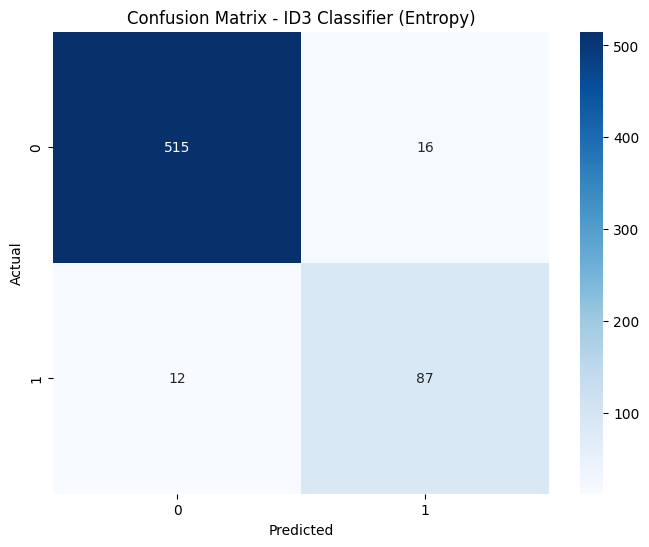

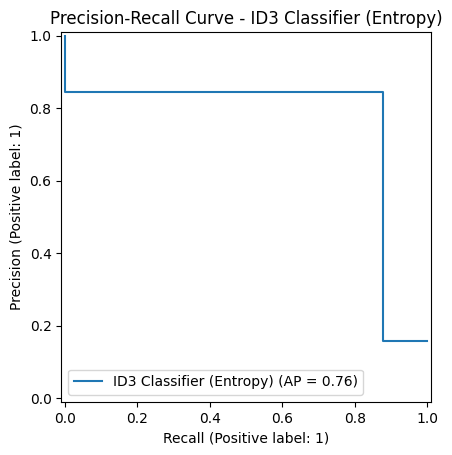



Results for C4.5 Classifier Approximation:
Accuracy: 0.9555555555555556
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       531
           1       0.84      0.88      0.86        99

    accuracy                           0.96       630
   macro avg       0.91      0.92      0.92       630
weighted avg       0.96      0.96      0.96       630



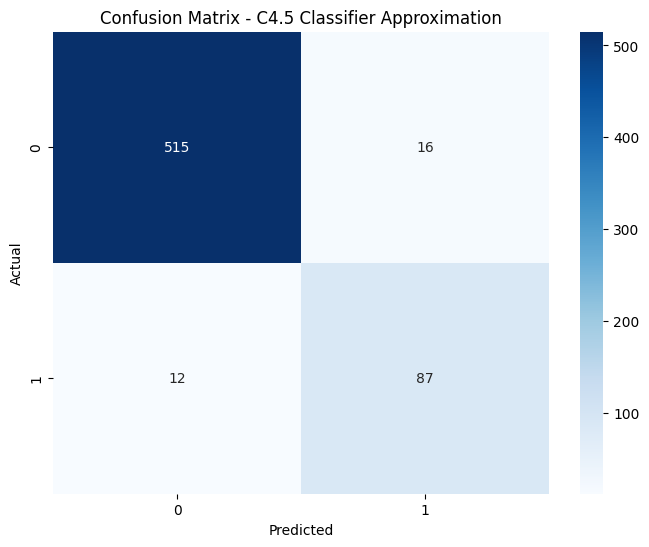

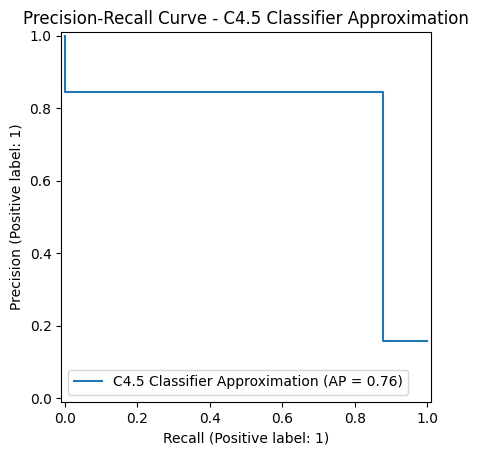



Results for Extra Tree Classifier:
Accuracy: 0.9571428571428572
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       531
           1       0.89      0.83      0.86        99

    accuracy                           0.96       630
   macro avg       0.93      0.90      0.92       630
weighted avg       0.96      0.96      0.96       630



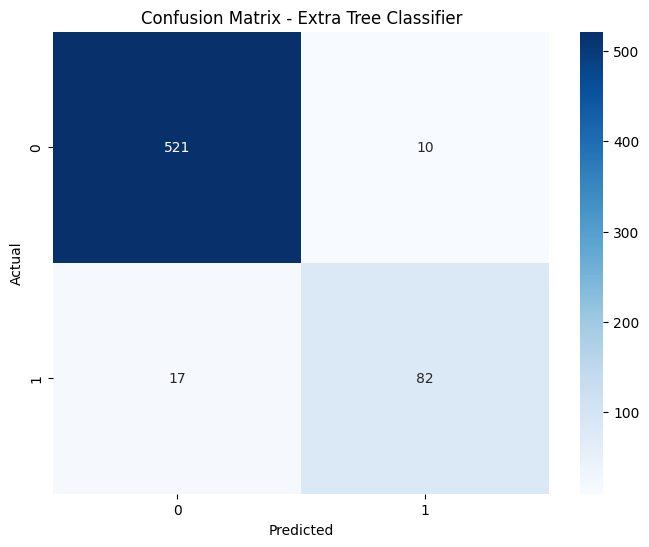

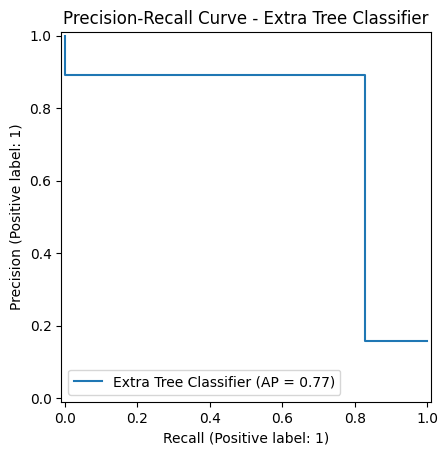



Results for Random Forest Classifier:
Accuracy: 0.9793650793650793
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       531
           1       0.99      0.88      0.93        99

    accuracy                           0.98       630
   macro avg       0.98      0.94      0.96       630
weighted avg       0.98      0.98      0.98       630



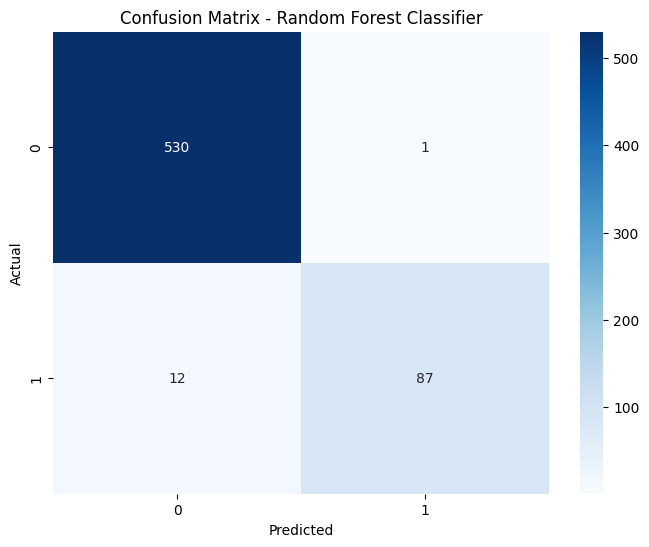

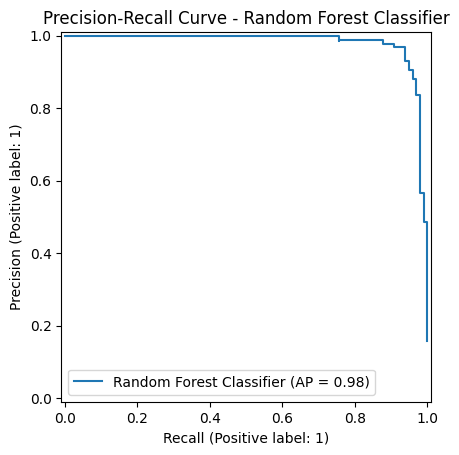



Results for Gradient Boosting Classifier:
Accuracy: 0.9523809523809523
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       531
           1       0.94      0.75      0.83        99

    accuracy                           0.95       630
   macro avg       0.95      0.87      0.90       630
weighted avg       0.95      0.95      0.95       630



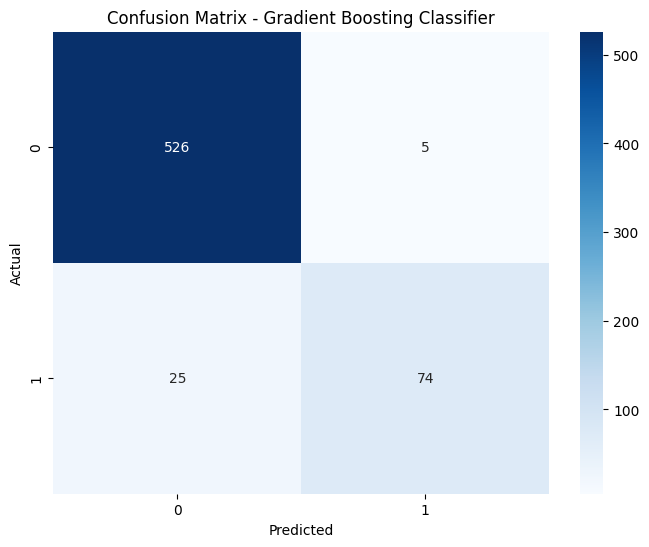

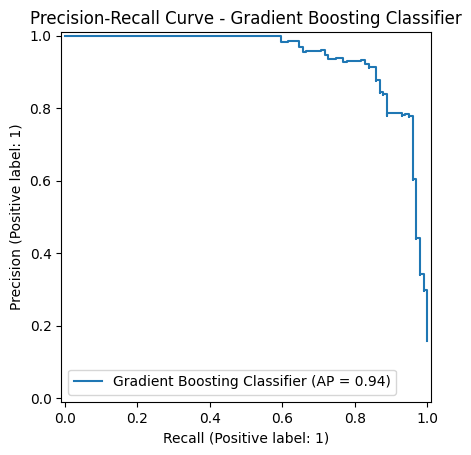

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Results for AdaBoost Classifier with Decision Tree:
Accuracy: 0.9571428571428572
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       531
           1       0.88      0.85      0.86        99

    accuracy                           0.96       630
   macro avg       0.92      0.91      0.92       630
weighted avg       0.96      0.96      0.96       630



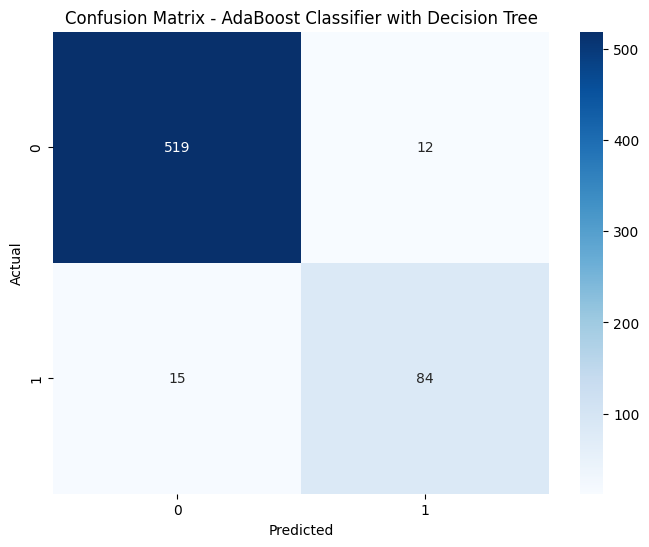

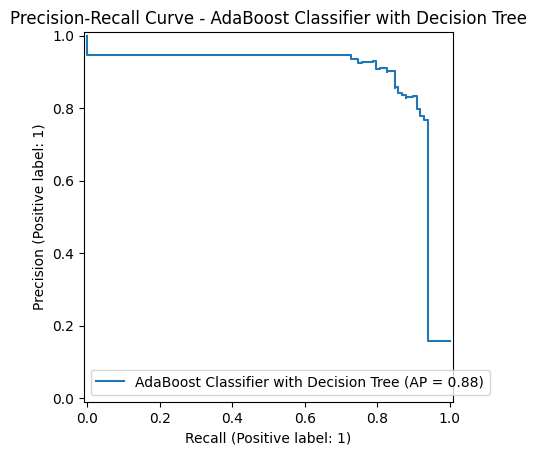



Results for XGBoost Classifier:
Accuracy: 0.9809523809523809
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       531
           1       0.95      0.93      0.94        99

    accuracy                           0.98       630
   macro avg       0.97      0.96      0.96       630
weighted avg       0.98      0.98      0.98       630



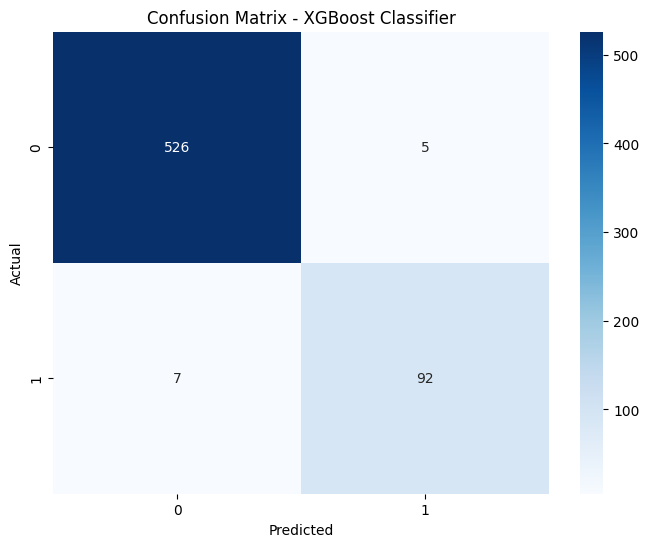

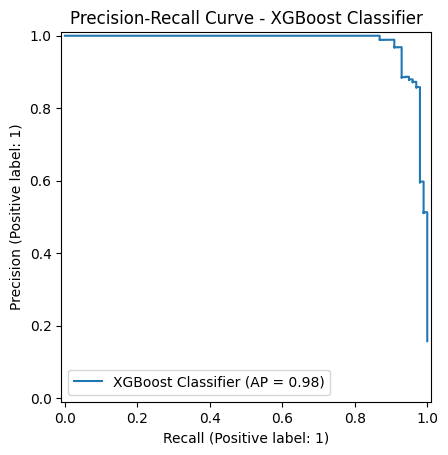

In [60]:
# Function to perform hyperparameter tuning
def tune_model(model, param_grid, model_name):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    train_and_evaluate_model(best_model, model_name + " (Tuned)")

# Function to train and evaluate a model
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    print(f"Results for {model_name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Plot Precision-Recall Curve
    try:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba, name=model_name)
        plt.title(f"Precision-Recall Curve - {model_name}")
        plt.show()
    except AttributeError:
        print(f"Warning: {model_name} does not support probability predictions.")
    
    print("\n" + "="*50 + "\n")

# Hyperparameter grids
param_grids = {
    "CART Classifier (Gini)": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 50],
        'min_samples_split': [2, 5, 10]
    },
    "ID3 Classifier (Entropy)": {
        'criterion': ['entropy'],
        'max_depth': [None, 10, 20, 30, 50],
        'min_samples_split': [2, 5, 10]
    },
    "Extra Tree Classifier": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest Classifier": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "Gradient Boosting Classifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    },
    "AdaBoost Classifier with Decision Tree": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5, 1.0],
        'estimator__max_depth': [1, 2, 3, 5]
    }
}

# 1. CART (Classification and Regression Tree) - Gini impurity
cart_classifier = DecisionTreeClassifier(criterion='gini', random_state=42)
train_and_evaluate_model(cart_classifier, "CART Classifier (Gini)")

# 2. ID3 - Approximated using entropy as the criterion
id3_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
train_and_evaluate_model(id3_classifier, "ID3 Classifier (Entropy)")

# 3. C4.5 - Approximated using entropy, similar to ID3
c4_5_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
train_and_evaluate_model(c4_5_classifier, "C4.5 Classifier Approximation")

# 4. Extra Tree Classifier (another variant of decision trees)
extra_tree_classifier = ExtraTreeClassifier(random_state=42)
train_and_evaluate_model(extra_tree_classifier, "Extra Tree Classifier")

# 5. Random Forest Classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
train_and_evaluate_model(random_forest_classifier, "Random Forest Classifier")

# 6. Gradient Boosting Classifier
gradient_boosting_classifier = GradientBoostingClassifier(random_state=42)
train_and_evaluate_model(gradient_boosting_classifier, "Gradient Boosting Classifier")

# 7. AdaBoost Classifier (with a Decision Tree as the base estimator)
adaboost_classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)
train_and_evaluate_model(adaboost_classifier, "AdaBoost Classifier with Decision Tree")

# 8. XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)
train_and_evaluate_model(xgb_classifier, "XGBoost Classifier")

Model Rules

In [16]:


def extract_rules_from_tree(model, model_name, feature_names):
    """
    Extract and display rules from a decision tree or tree-based model.
    For ensemble models, rules are extracted from individual trees.
    
    Args:
    - model: The trained model.
    - model_name: Name of the model (for display purposes).
    - feature_names: List of feature names (for meaningful rules).
    """
    print(f"Rules for {model_name}:")
    if isinstance(model, DecisionTreeClassifier) or isinstance(model, ExtraTreeClassifier):
        # Extract rules for single decision trees
        rules = export_text(model, feature_names=feature_names)
        print(rules)
    
    elif isinstance(model, RandomForestClassifier):
        # Extract rules from each tree in the Random Forest
        for i, tree in enumerate(model.estimators_[:3]):  # Show rules from the first 3 trees
            print(f"\nRules for Tree {i + 1} in Random Forest:")
            rules = export_text(tree, feature_names=feature_names)
            print(rules)
    
    elif isinstance(model, GradientBoostingClassifier):
        # Extract rules from each tree in Gradient Boosting
        for i, tree in enumerate(model.estimators_[:3, 0]):  # Show rules from the first 3 trees
            print(f"\nRules for Tree {i + 1} in Gradient Boosting:")
            rules = export_text(tree, feature_names=feature_names)
            print(rules)
    
    elif isinstance(model, AdaBoostClassifier):
        # Extract rules from each tree in AdaBoost
        for i, tree in enumerate(model.estimators_[:3]):  # Show rules from the first 3 trees
            print(f"\nRules for Tree {i + 1} in AdaBoost:")
            rules = export_text(tree, feature_names=feature_names)
            print(rules)
    
    elif isinstance(model, xgb.XGBClassifier):
        # Extract rules for XGBoost trees
        print("XGBoost models use binary splits; consider visualizing the model.")
        for i in range(3):  # Show rules for the first 3 trees
            print(f"\nRules for Tree {i + 1} in XGBoost:")
            print(model.get_booster().trees_to_dataframe(tree_index=i).to_string(index=False))
    else:
        print(f"Rule extraction is not supported for {model_name}.")
    print("\n" + "="*50 + "\n")


# Example: Extracting rules from your models
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]

extract_rules_from_tree(cart_classifier, "CART Classifier (Gini)", feature_names)
extract_rules_from_tree(id3_classifier, "ID3 Classifier (Entropy)", feature_names)
extract_rules_from_tree(extra_tree_classifier, "Extra Tree Classifier", feature_names)
extract_rules_from_tree(random_forest_classifier, "Random Forest Classifier", feature_names)
extract_rules_from_tree(gradient_boosting_classifier, "Gradient Boosting Classifier", feature_names)
extract_rules_from_tree(adaboost_classifier, "AdaBoost Classifier with Decision Tree", feature_names)



Rules for CART Classifier (Gini):
|--- Complains_woe <= 1.38
|   |--- Status_woe <= 0.18
|   |   |--- Frequency of use_woe <= 1.03
|   |   |   |--- Customer Value_woe <= -1.82
|   |   |   |   |--- class: 0
|   |   |   |--- Customer Value_woe >  -1.82
|   |   |   |   |--- Subscription  Length_woe <= 0.67
|   |   |   |   |   |--- Subscription  Length_woe <= -0.37
|   |   |   |   |   |   |--- Charge  Amount_woe <= -1.33
|   |   |   |   |   |   |   |--- Customer Value_woe <= 0.08
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Customer Value_woe >  0.08
|   |   |   |   |   |   |   |   |--- Age_woe <= -0.04
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Age_woe >  -0.04
|   |   |   |   |   |   |   |   |   |--- Frequency of use_woe <= 0.17
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- Frequency of use_woe >  0.17
|   |   |   |   |   |   |   |   |   |   |--- Call  Failure_wo

Data Loaded Successfully.
Dataset Shape: (3150, 14)
Columns: ['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age', 'Customer Value', 'Churn'] 

Feature Matrix Shape: (3150, 13)
Target Vector Shape: (3150,) 

Train Set Shape: (2520, 13) (2520,)
Test  Set Shape: (630, 13) (630,) 

Starting Grid Search...
Fitting 5 folds for each of 213 candidates, totalling 1065 fits
Grid Search Complete.

ALL CROSS-VALIDATION RESULTS (Sorted by mean_test_score):
                                                                                                                                         params  mean_test_score  std_test_score  rank_test_score
     {'clf': ExtraTreesClassifier(), 'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__min_samples_split': 5, 'clf__n_estimators': 50}         0.971032        0.003888                1
       {'clf':

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


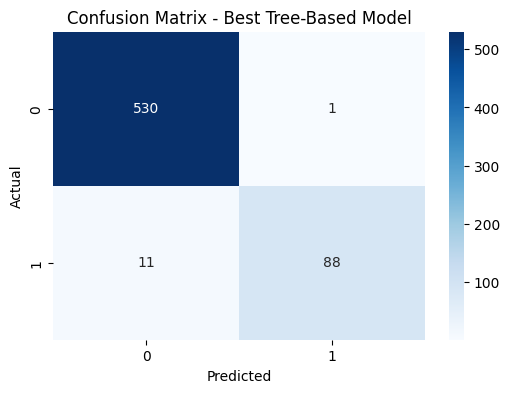

In [61]:
def main():
 
    df = pd.read_csv('Customer_Churn_Modified.csv')

    print("Data Loaded Successfully.")
    print("Dataset Shape:", df.shape)
    print("Columns:", df.columns.tolist(), "\n")


    target_col = 'Churn'  
    X = df.drop(target_col, axis=1)
    y = df[target_col]

    # Quick check
    print("Feature Matrix Shape:", X.shape)
    print("Target Vector Shape:", y.shape, "\n")

    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        test_size=0.2, 
        random_state=42, 
        stratify=y
    )

    print("Train Set Shape:", X_train.shape, y_train.shape)
    print("Test  Set Shape:", X_test.shape, y_test.shape, "\n")

 
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', DecisionTreeClassifier())  
    ])

   
    param_grid = [
        
        {
            'clf': [DecisionTreeClassifier()],
            'clf__criterion': ['gini', 'entropy'],
            'clf__max_depth': [None, 5, 10, 20],
            'clf__min_samples_split': [2, 5, 10],
        },
        
        {
            'clf': [RandomForestClassifier()],
            'clf__n_estimators': [50, 100, 200],
            'clf__criterion': ['gini', 'entropy'],
            'clf__max_depth': [None, 5, 10],
            'clf__min_samples_split': [2, 5, 10],
           
        },
      
        {
            'clf': [ExtraTreesClassifier()],
            'clf__n_estimators': [50, 100, 200],
            'clf__criterion': ['gini', 'entropy'],
            'clf__max_depth': [None, 5, 10],
            'clf__min_samples_split': [2, 5, 10],
           
        },
     
        {
            'clf': [GradientBoostingClassifier()],
            'clf__n_estimators': [50, 100, 200],
            'clf__learning_rate': [0.01, 0.1, 0.2],
            'clf__max_depth': [3, 5, 10],
            'clf__min_samples_split': [2, 5, 10],
           
        }
    ]

  
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='accuracy',   
        cv=5,                
        n_jobs=-1,          
        verbose=1
    )

    print("Starting Grid Search...")
    grid_search.fit(X_train, y_train)
    print("Grid Search Complete.\n")


    results_df = pd.DataFrame(grid_search.cv_results_)
  
    cols_of_interest = [
        'params', 
        'mean_test_score', 
        'std_test_score', 
        'rank_test_score'
    ]
    sorted_results_df = results_df[cols_of_interest].sort_values(
        by='mean_test_score', 
        ascending=False
    )

    print("ALL CROSS-VALIDATION RESULTS (Sorted by mean_test_score):")
    print(sorted_results_df.to_string(index=False), "\n")

    print("BEST PARAMETERS (from cross-validation):", grid_search.best_params_)
    print("BEST CV ACCURACY:", grid_search.best_score_, "\n")

 
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    test_accuracy = accuracy_score(y_test, y_pred)
    print("TEST ACCURACY (Best Model):", test_accuracy, "\n")

    print("CONFUSION MATRIX (Best Model):")
    print(confusion_matrix(y_test, y_pred), "\n")

    print("CLASSIFICATION REPORT (Best Model):")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(6, 4))
    sns.heatmap(
        confusion_matrix(y_test, y_pred),
        annot=True,
        fmt="d",
        cmap="Blues"
    )
    plt.title("Confusion Matrix - Best Tree-Based Model")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

if __name__ == "__main__":
    main()
